# Свойства оценок

4 задание:

Сгенерировать выборку из стандартного нормального распределения для N = $10^{4}$

Для всех меньших n посчитать эмпирическую функцию распределения, для некоторых (n из {10, 25, 50, 100, 1000, N}) построить ее график, нанести на каждый из них истинную функцию распределения

Для всех меньших n посчитать точное значение $D_n=\sup_{x\in \\R} |F(x) - F_n(x)|$

Построить график зависимости статистик $D_n$ и $n^{1/2}D_n$

In [6]:
#импортируем необходимые библиотеки
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
from copy import copy

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
def Fn(sample, x):
    summary = 0;
    for i in range(0, len(sample)) :
        if (sample[i] < x) :
            summary += 1
    return summary/len(sample)

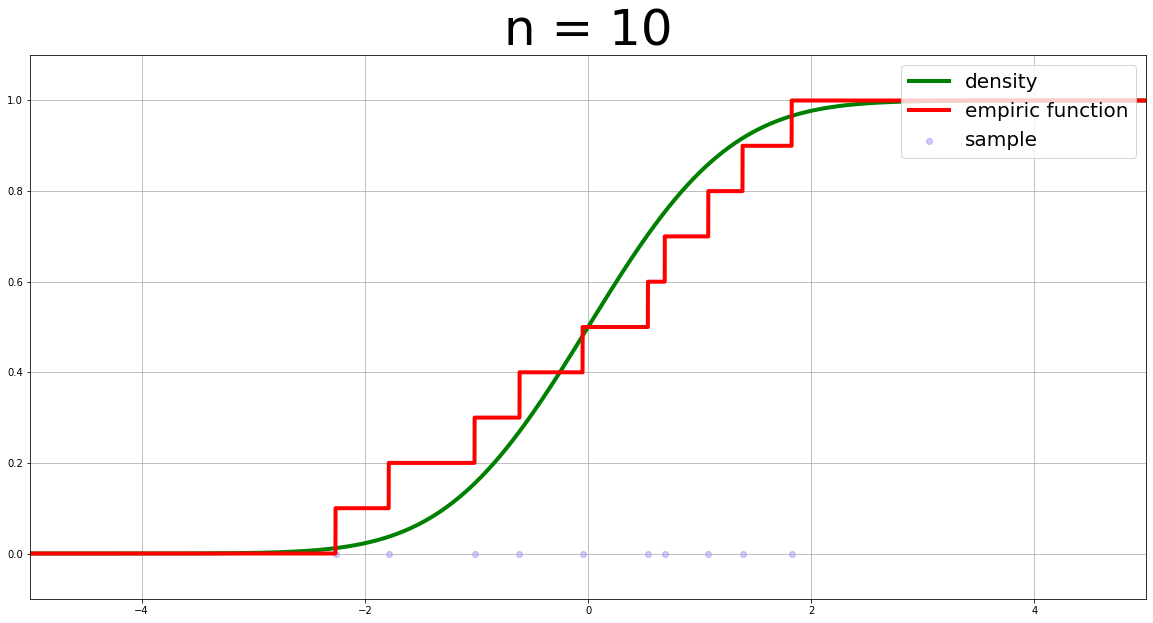

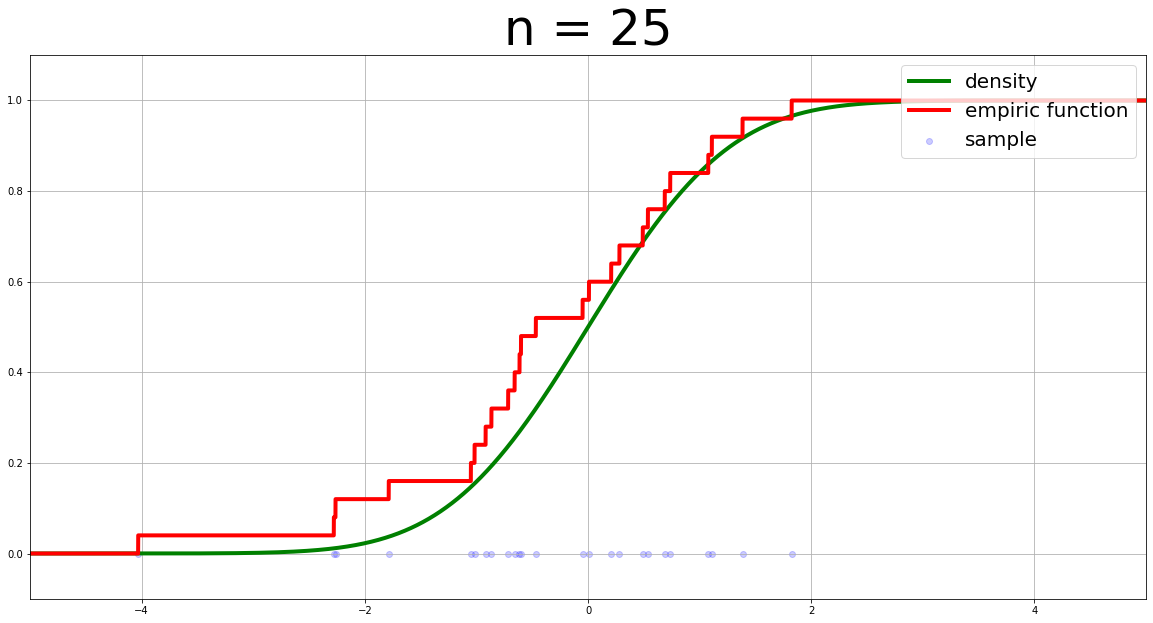

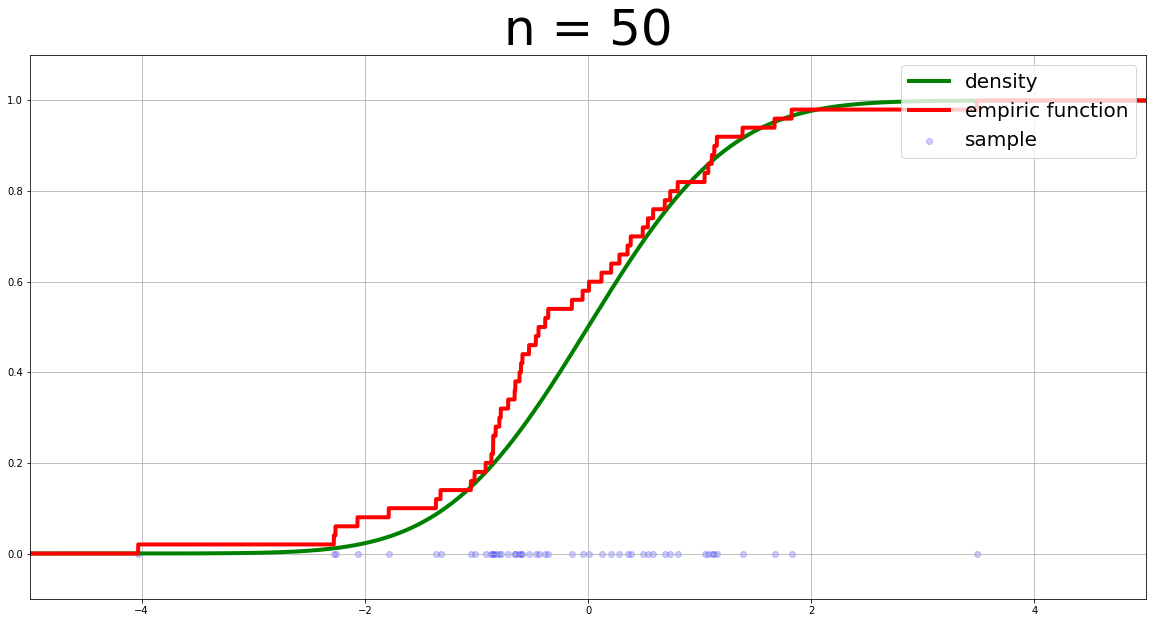

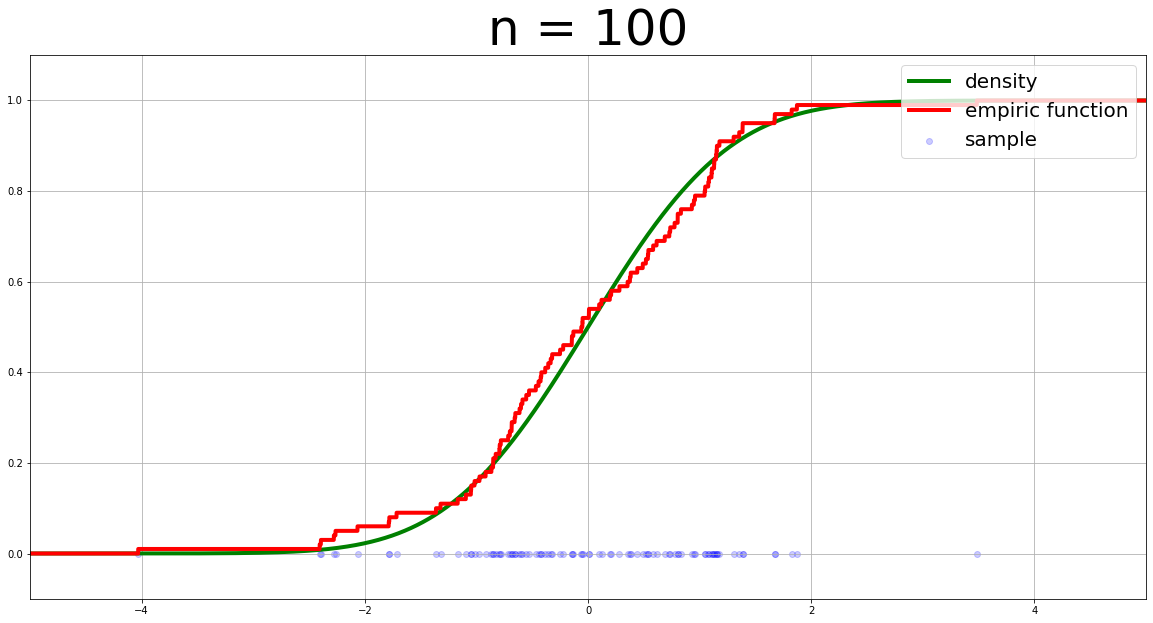

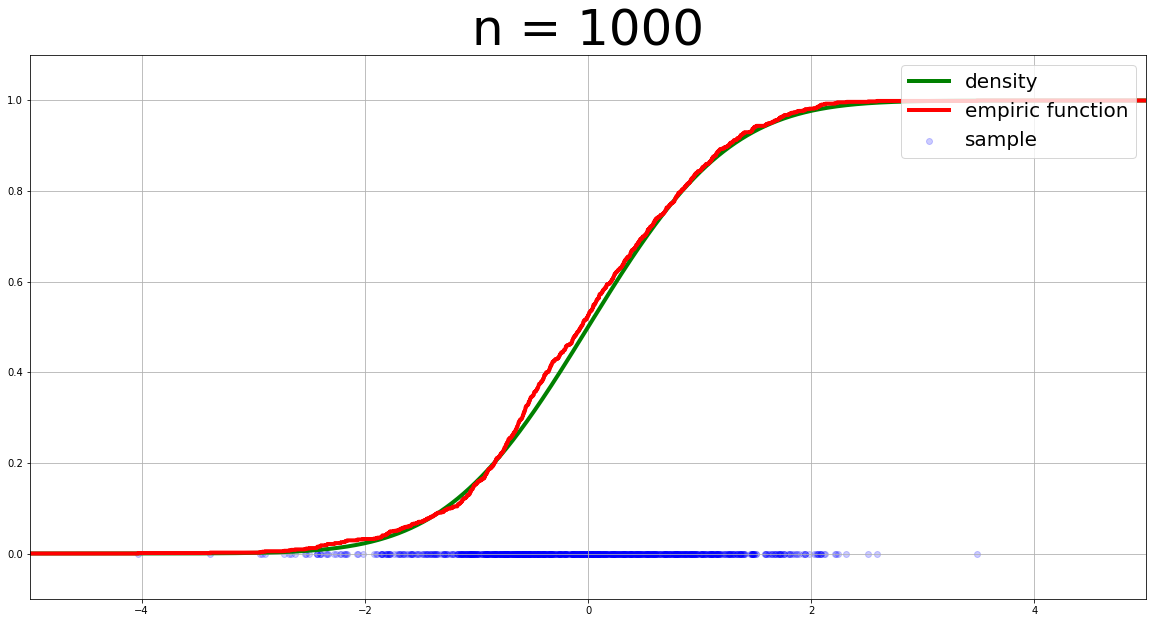

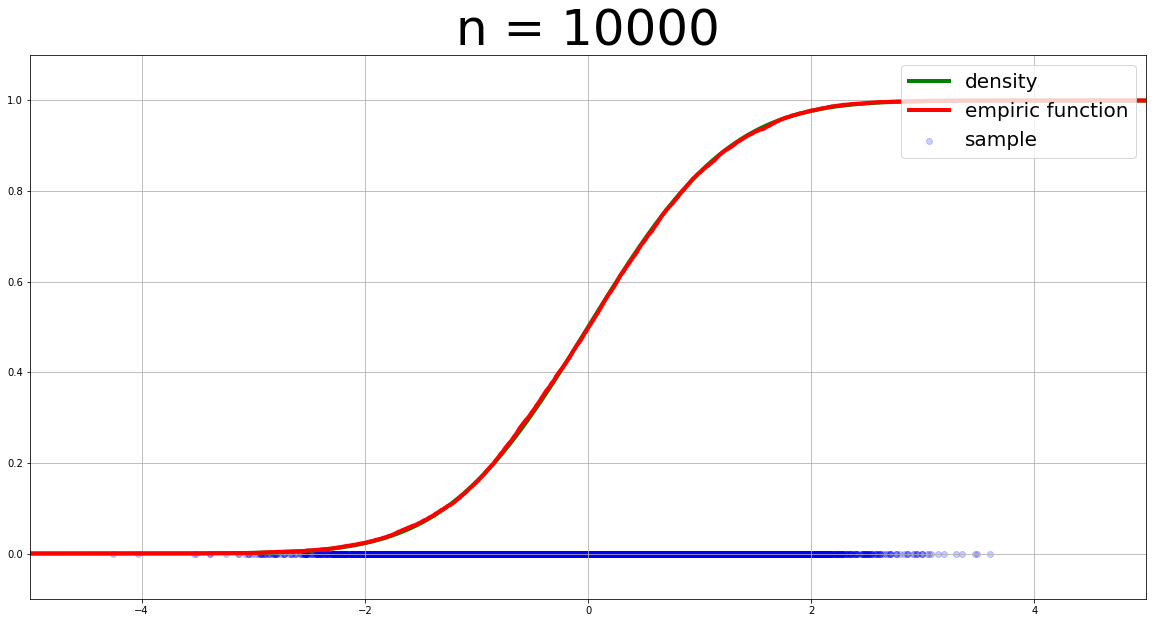

In [8]:
#генерируем выборку
N = 10**4
X = sps.norm.rvs(size = N, loc = 0, scale = 1)

#строим графики
grid = np.linspace(-5, 5, N)
for i in [10, 25, 50, 100, 1000, N] :
    plt.figure(figsize=(20, 10))
    plt.ylim(-0.1, 1.1);
    plt.xlim(-5, 5);
    plt.title("n = " + str(i), fontsize = 50)
    plt.grid()

    F = sps.norm.cdf(grid)
    
    plt.scatter(X[:i], np.zeros(len(X[:i])), alpha=0.2, color = "blue", label='sample')
    plt.plot(grid, F, color='green', label='density', linewidth=4)
    plt.plot(grid, [Fn(sorted(X[:i]), x) for x in grid], 'r', 
             label='empiric function', linewidth=4)
    
    plt.legend(loc = 'upper right', fontsize = 20)
    plt.show()

In [9]:
x_left = -5;
x_right = 5;

def find_x_pos(x):
    if x < x_left:
        return 0
    if x > x_right:
        return 10 ** 9
    return int((x + 5) * N/(x_right - x_left))

empiric_funcs = [[0] * N]
for n in range(1, N + 1):
    if n > 1:
        empiric_funcs.append(copy(empiric_funcs[-1]))
    pos = find_x_pos(X[n - 1])
    for i in range(pos, N):
        empiric_funcs[-1][i] += 1
        
for n in range(1, N+1):
    empiric_funcs[n-1] = [x/n for x in empiric_funcs[n-1]]

In [10]:
#вычислим значение Dn
grid = np.linspace(-5, 5, N)
Dn = []
for i in range(1, N+1):
    Dn.append(max([abs(F[j] - empiric_funcs[i-1][j]) for j in range(i)]))

In [11]:
#предпосчитаем Dn*sqrt(n)
Dnn = []
for i in range(0, N):
    Dnn.append(Dn[i]*(i**1/2))

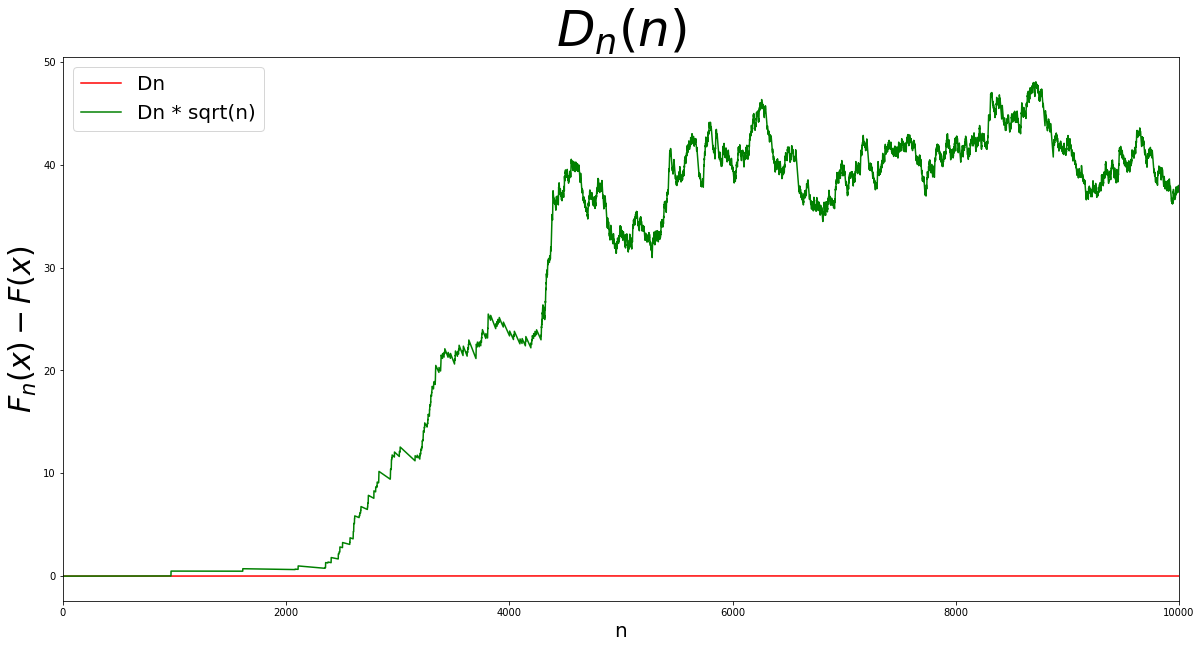

In [12]:
#построим график
plt.figure(figsize=(20,10))
plt.title('$D_n(n)$', fontsize = 50)
plt.plot(np.arange(1, N + 1), Dn, color = 'red', label = "Dn");
plt.plot(np.arange(1, N + 1), Dnn, color = 'green', label = "Dn * sqrt(n)");
plt.legend(fontsize = 20);
plt.xlabel('n', fontsize = 20);
plt.ylabel('$F_n(x) - F(x)$', fontsize = 30);
plt.xlim(0, N);
plt.show()